# Dynamic Time Warping (DTW)

In [1]:
import os
from dtw import *
import numpy as np
import librosa
import librosa.display
import moviepy.editor as mp
import matplotlib.pyplot as plt
from IPython.display import Audio

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [3]:
pip install dtw-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
#sr-sampling rate
y1, fs1 = librosa.load('C:\\Users\\Rithanya.G\\Documents\\Dynamic-Time-Warping-main\\M05_B2_D3_M6.wav', sr=16000)
Audio(y1, rate=fs1)

In [3]:
y2, fs2 = librosa.load('C:\\Users\\Rithanya.G\\Documents\\Dynamic-Time-Warping-main\\M05_B2_D4_M2.wav', sr=16000)
Audio(y2, rate=fs2)

In [4]:
y3, fs3 = librosa.load('C:\\Users\\Rithanya.G\\Documents\\Dynamic-Time-Warping-main\\M08_B1_D3_M8.wav', sr=16000)
Audio(y3, rate=fs3)

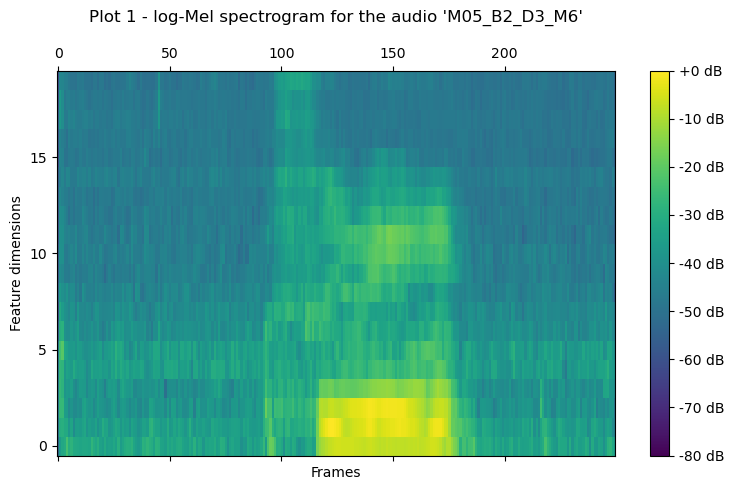

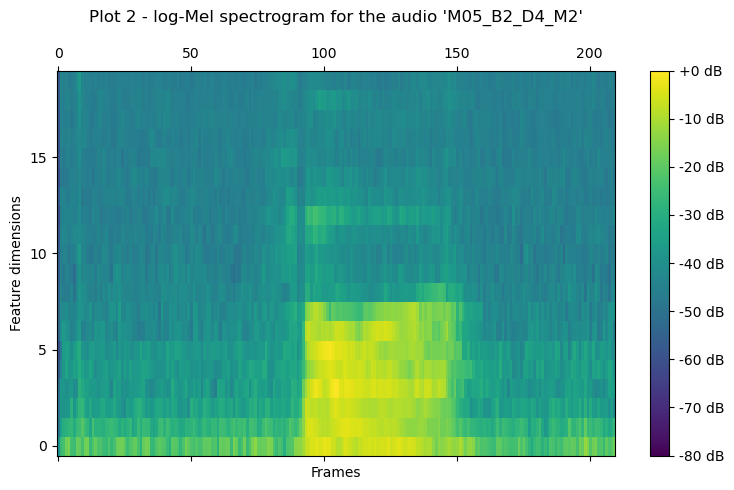

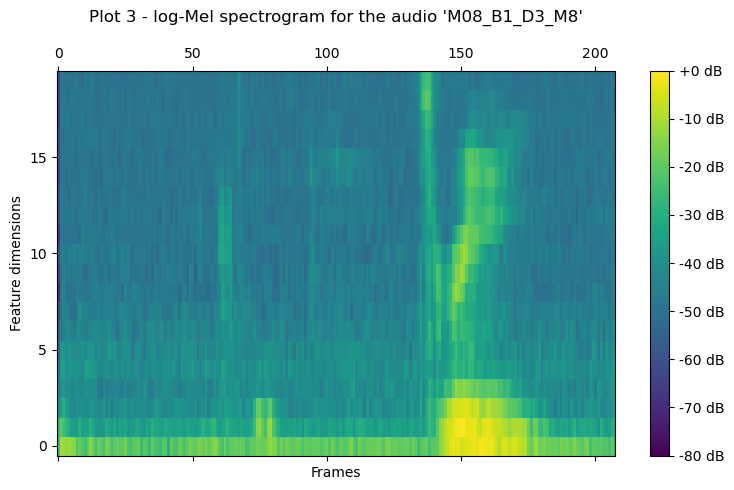

In [5]:
paths = [
    'C:\\Users\\Rithanya.G\\Documents\\Dynamic-Time-Warping-main\\M05_B2_D3_M6.wav',
    'C:\\Users\\Rithanya.G\\Documents\\Dynamic-Time-Warping-main\\M05_B2_D4_M2.wav',
    'C:\\Users\\Rithanya.G\\Documents\\Dynamic-Time-Warping-main\\M08_B1_D3_M8.wav'
]

audio = ["M05_B2_D3_M6", "M05_B2_D4_M2", "M08_B1_D3_M8"]

# Iterate through sample paths and plot log-Mel spectrograms
for i, sample_path in enumerate(paths):
    y, f_s = librosa.load(sample_path, sr=16000)  # Reducing the sampling rate to 16 kHz
    y = librosa.util.normalize(y.astype(np.float32))

    # Mel-scale spectrogram with reduced resolution and fewer mel bins
    n_fft = int(0.025 * f_s)      # 25 ms
    hop_length = int(0.01 * f_s)  # 10 ms
    n_mels = 20  # Reduce the number of mel bins
    mel_spec = librosa.feature.melspectrogram(
        y=y, sr=f_s, n_mels=n_mels,
        n_fft=n_fft, hop_length=hop_length
    )
    log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)

    # Plot log-Mel spectrogram
    fig, ax = plt.subplots(figsize=(9, 5))
    cax = ax.matshow(log_mel_spec, origin="lower", cmap='viridis', aspect='auto', vmin=-80)
    plt.ylabel("Feature dimensions")
    plt.xlabel("Frames")
    plt.title(f"Plot {i+1} - log-Mel spectrogram for the audio '{audio[i]}'", pad=35)
    plt.colorbar(cax, format='%+2.0f dB')
    plt.show()

In [6]:
# Compute log Mel spectrograms for each audio
log_mel_specs = []
for sample_path in paths:
    y, f_s = librosa.load(sample_path, sr=16000)  # Reducing the sampling rate to 16 kHz

    # Mel-scale spectrogram with reduced resolution and fewer mel bins
    n_fft = int(0.025 * f_s)      # 25 ms
    hop_length = int(0.01 * f_s)  # 10 ms
    mel_spec = librosa.feature.melspectrogram(
        y=y, sr=f_s, n_mels=n_mels,
        n_fft=n_fft, hop_length=hop_length
    )
    log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)

    # Transpose for DTW analysis
    log_mel_spec = log_mel_spec.T

    log_mel_specs.append(log_mel_spec)

Normalized DTW Alignment Cost for 0 and 1: 22.703669730173935


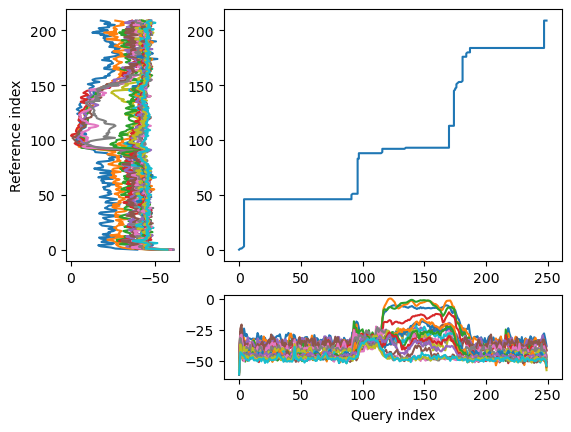

In [7]:
# Perform DTW between audio 0 and 1
query = log_mel_specs[0]
template = log_mel_specs[1]

# Perform DTW and calculate normalized cost
alignment = dtw(query, template, keep_internals=True)
normalized_alignment_cost1 = alignment.normalizedDistance

# Print the DTW normalized cost
print('Normalized DTW Alignment Cost for 0 and 1:', normalized_alignment_cost1)

#Top plot: This plot shows the first sequence (query in this case) along the x-axis. 
#Each point represents a frame or element in the sequence.
#Left plot: This plot shows the second sequence (template in this case) along the y-axis. 
#Each point represents a frame or element in the sequence.
#Bottom plot: This plot shows the alignment path between the two sequences.
#The alignment path connects the matching frames between the two sequences, showing how they align with each other.

alignment.plot(type="threeway")
plt.show()

Normalized DTW Alignment Cost for 0 and 2: 21.129835776854897


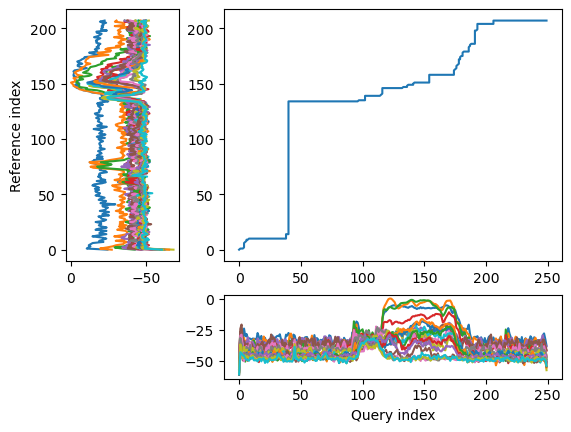

In [8]:
# Perform DTW between audios 0 and 2
query = log_mel_specs[0]
template = log_mel_specs[2]

# Perform DTW and calculate normalized cost
alignment = dtw(query, template, keep_internals=True)
normalized_alignment_cost2 = alignment.normalizedDistance

# Print the DTW normalized cost
print('Normalized DTW Alignment Cost for 0 and 2:', normalized_alignment_cost2)

alignment.plot(type="threeway")

plt.show()

Normalized DTW Alignment Cost for 1 and 2: 24.7867224115979


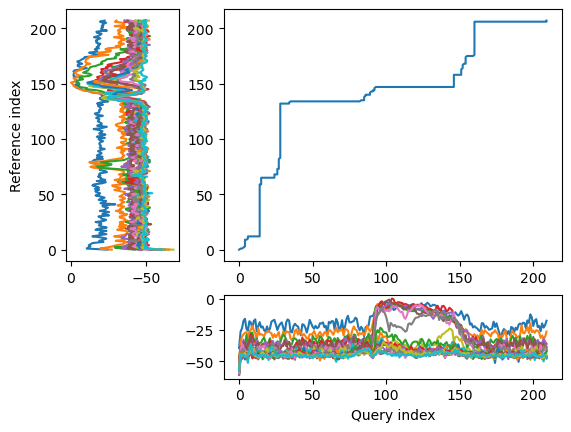

In [9]:
# Perform DTW between audios 1 and 2
query = log_mel_specs[1]
template = log_mel_specs[2]

# Perform DTW and calculate normalized cost
alignment = dtw(query, template, keep_internals=True)
normalized_alignment_cost3 = alignment.normalizedDistance

# Print the DTW normalized cost
print('Normalized DTW Alignment Cost for 1 and 2:', normalized_alignment_cost3)

alignment.plot(type="threeway")

plt.show()

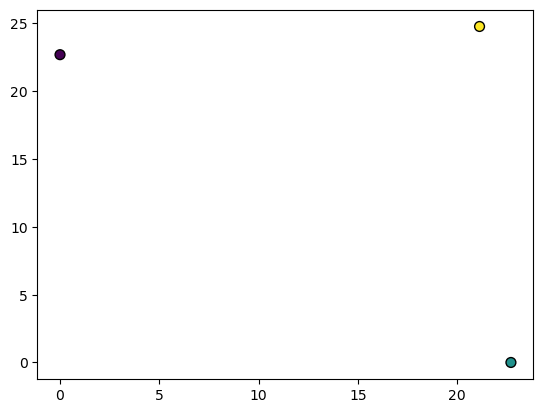

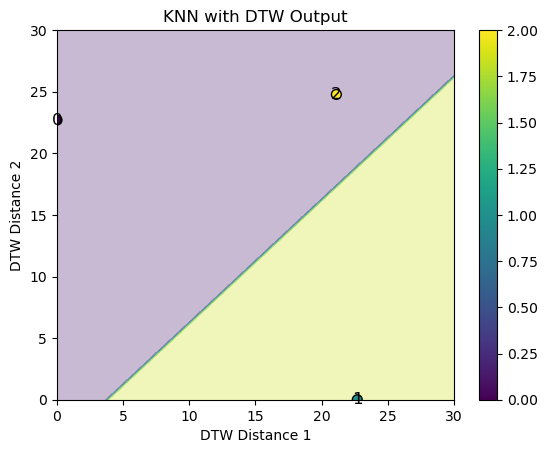

In [10]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Sample DTW distances for three audio files [00,01,02|10,11,12|20,21,22]
dtw_distances = np.array([[0, 22.70, 21.12], [22.70, 0, 24.78], [21.12, 24.78, 0]])


# Labels for the audio files
labels = np.array([0, 1, 2])  # Example labels, replace with your actual labels

# Number of nearest neighbors to consider
k = 2

# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the classifier using the DTW distances and labels
knn.fit(dtw_distances, labels)

# Plot the decision boundary
plt.figure()
plt.scatter(dtw_distances[:, 0], dtw_distances[:, 1], c=labels, cmap='viridis', s=50, edgecolors='k')

# Create meshgrid for the contour plot
xx, yy,zz = np.meshgrid(np.linspace(0, 30, 100), np.linspace(0, 30, 100), np.linspace(0, 2.5, 100))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel(), zz.ravel()])

# Reshape the result for plotting
Z = Z.reshape(xx.shape)

# Put the result into a color plot
plt.figure()
plt.contourf(xx[:, :, 0], yy[:, :, 0], Z[:, :, 0], alpha=0.3, cmap='viridis')
# Scatter plot of the data
plt.scatter(dtw_distances[:, 0], dtw_distances[:, 1], c=labels, cmap='viridis', s=50, edgecolors='k')
for i, label in enumerate(labels):
    plt.text(dtw_distances[i, 0], dtw_distances[i, 1], str(label), color='black', fontsize=12, ha='center', va='center')
plt.xlabel('DTW Distance 1')
plt.ylabel('DTW Distance 2')
plt.title('KNN with DTW Output')
plt.colorbar()
plt.show()


Accuracy: 1.0


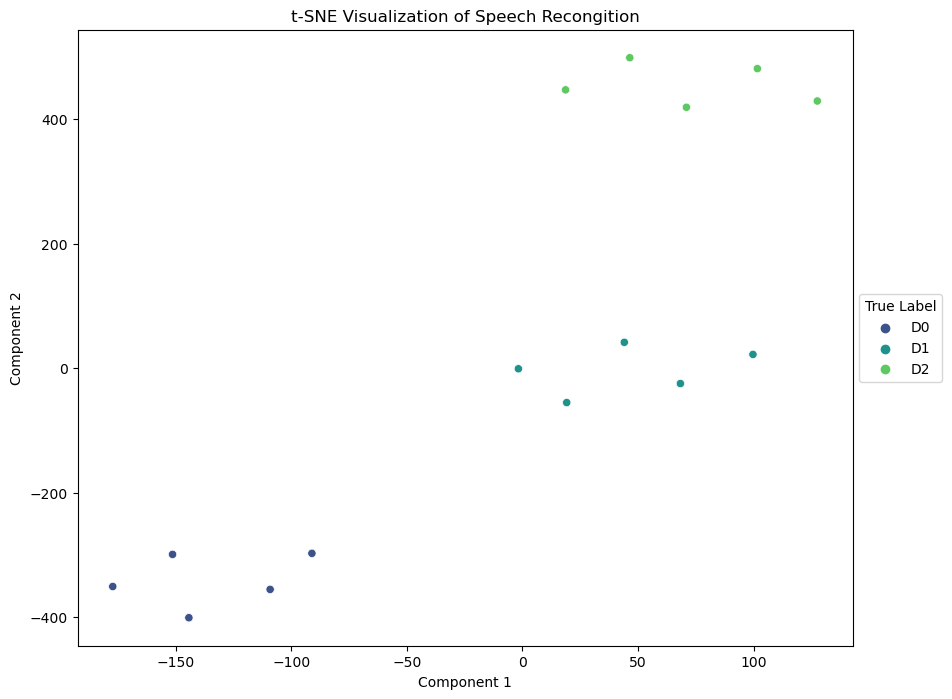

In [1]:
import os
import numpy as np
import librosa
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.manifold import TSNE

# Function to extract log-Mel spectrogram features from audio file
def extract_log_mel_spectrogram(audio_path, sr=16000, n_mels=20, n_fft=400, hop_length=160):
    y, _ = librosa.load(audio_path, sr=sr)
    y = librosa.util.normalize(y.astype(np.float32))
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels, n_fft=n_fft, hop_length=hop_length)
    log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)
    return log_mel_spec

# Path to the directory containing audio files
audio_dir = 'C:\\Users\\Rithanya.G\\Documents\\Dynamic-Time-Warping-main\\'

# List of audio file names
audio_files = [
    'F02_B1_D0_M2.wav', 'F02_B1_D0_M3.wav', 'F02_B1_D0_M4.wav',
    'F02_B1_D1_M2.wav', 'F02_B1_D1_M3.wav', 'F02_B1_D1_M4.wav',
    'F02_B1_D2_M2.wav', 'F02_B1_D2_M3.wav', 'F02_B1_D2_M4.wav',
    'F02_B1_D0_M5.wav', 'F02_B1_D0_M6.wav', 'F02_B1_D1_M5.wav',
    'F02_B1_D1_M6.wav', 'F02_B1_D2_M5.wav', 'F02_B1_D2_M6.wav'
]

# List of labels corresponding to the audio files
labels = ['D0', 'D0', 'D0', 'D1', 'D1', 'D1', 'D2', 'D2', 'D2', 'D0', 'D0', 'D1', 'D1', 'D2', 'D2']

# Define the maximum number of frames for padding
max_frames = 500

# Extract log-Mel spectrogram features for each audio file
features = []
for file_name in audio_files:
    audio_path = os.path.join(audio_dir, file_name)
    log_mel_spec = extract_log_mel_spectrogram(audio_path)
    # Pad or truncate the spectrogram to a fixed number of frames
    if log_mel_spec.shape[1] < max_frames:
        pad_width = max_frames - log_mel_spec.shape[1]
        log_mel_spec = np.pad(log_mel_spec, ((0, 0), (0, pad_width)), mode='constant', constant_values=0)
    else:
        log_mel_spec = log_mel_spec[:, :max_frames]
    features.append(log_mel_spec.flatten())  # Flatten the spectrogram to create a feature vector

# Convert features and labels to NumPy arrays
features_array = np.array(features)
labels_array = np.array(labels)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features_array, labels_array, test_size=0.2, random_state=42)

# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
knn.fit(X_train, y_train)

# Predict labels for the test set
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Fit t-SNE on the features
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
X_embedded = tsne.fit_transform(features_array)

# Create a DataFrame for easier plotting
import pandas as pd
df = pd.DataFrame(X_embedded, columns=['Component 1', 'Component 2'])
df['True Label'] = labels

# Plot the scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Component 1', y='Component 2', hue='True Label', data=df, palette='viridis', legend='full')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('t-SNE Visualization of Speech Recongition')
plt.legend(title='True Label', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
